In [7]:
!tar -zxvf ../kaggle_3m.tar.gz

kaggle_3m/
kaggle_3m/TCGA_HT_8114_19981030/
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_4.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_13_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_14_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_1_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_12_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_22_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_22.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_13.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_15_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_10_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_16.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_6_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_7_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_20_mask.tif
kaggle_3m/TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_18

In [4]:
!pwd

/home/shawn103/brain_MRI_segmenation_tutorial


In [1]:
#Set Parameters
DATA_ROOT = '/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m'

In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import cv2
import re
from tqdm import tqdm_notebook, tnrange
from glob import glob
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 讀檔

In [3]:
train_files = []
mask_files = []

pattern = os.path.join(DATA_ROOT,'T*')
folders = sorted(glob(pattern))
for curr_folder in folders:
    curr_pattern = os.path.join(curr_folder,'*_mask*')
    curr_files = glob(curr_pattern)
    curr_files.sort(key=lambda f: int(re.sub('\D', '', f)))
    mask_files.extend(curr_files)

for i in mask_files:
    train_files.append(i.replace('_mask',''))
    
print('len(train_files)',len(train_files))
print('len(mask_files)',len(mask_files))

for i in range(11):
  print(train_files[i])
  print(mask_files[i])

len(train_files) 3929
len(mask_files) 3929
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_mask.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_2.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_2_mask.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_3.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_3_mask.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_4.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_4_mask.tif
/home/shawn103/brain_MRI_segmenation_tutorial/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494

# 牛刀小試1

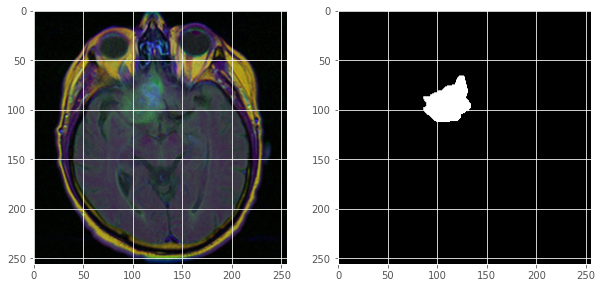

In [4]:
i = 10
test_img_path = train_files[i]
test_mask_path = mask_files[i]
img=cv2.imread(test_img_path)
mask=cv2.imread(test_mask_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask)

In [ ]:
print('type of img:', img)
print('shape of img:', ?.shape)
print('shape of mask:', ?)

print('min of img:', np.min(img))
print('min of mask:', np.min(?))
print('max of img:', ?)
print('max of mask:', ?)

print('unique value of mask:', np.unique(mask))

In [5]:
print('type of img:', type(img))
print('shape of img:', img.shape)
print('shape of mask:', mask.shape)

print('max of img:', np.max(img))
print('max of mask:', np.max(mask))
print('min of img:', np.min(img))
print('min of mask:', np.min(mask))
print('unique value of mask:', np.unique(mask))

type of img: <class 'numpy.ndarray'>
shape of img: (256, 256, 3)
shape of mask: (256, 256, 3)
max of img: 248
max of mask: 255
min of img: 0
min of mask: 0
unique value of mask: [  0 255]


# Display

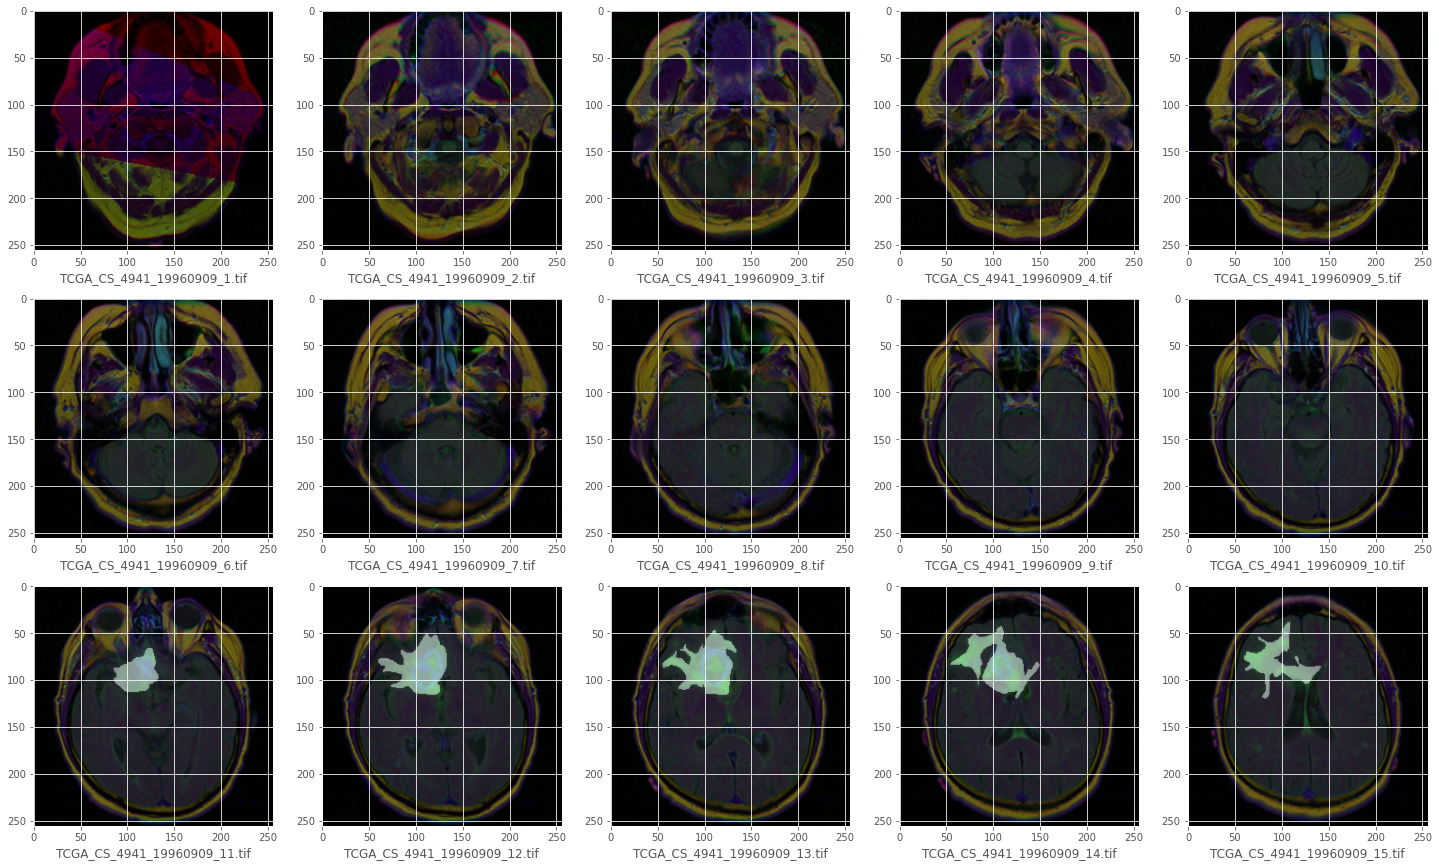

In [6]:
#Lets plot some samples
rows,cols=3,5
fig=plt.figure(figsize=(cols*5,rows*5))
base = 0
for i in range(0,rows*cols):
    curr_ax = fig.add_subplot(rows,cols,i+1)
    img_path=train_files[i+base]
    msk_path=mask_files[i+base]
    curr_ax.set_xlabel(os.path.basename(img_path))
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.4)
plt.show()

# 牛刀小試2

## 計算有幾張MRI有膠質瘤?

## 如果這張mask有值，代表這張MRI有膠質瘤，有病通常稱為positive(1)，沒病稱為negative(0)



In [18]:
def positive_negative_diagnosis(mask_path):
    max_value = ?(cv2.imread(mask_path))  # numpy function
    if max_value > 0:
        return ?
    else:
        return ?

In [7]:
def positive_negative_diagnosis(mask_path):
    max_value = np.max(cv2.imread(mask_path))
    if max_value > 0:
        return 1
    else:
        return 0

In [8]:
from pathlib import Path
positives = []
IDs = []

for curr_mask_path in mask_files:
    positives.append(positive_negative_diagnosis(curr_mask_path))
    IDs.append(Path(curr_mask_path).parent.name)                  # folder name
    
df = pd.DataFrame(data={"ID": IDs, "filename": train_files, 'mask_path' : mask_files, 'diagnosis': positives})
df.to_csv('Diagnosis.csv',index=False)
df

,ID,filename,mask_path,diagnosis
0,TCGA_CS_4941_19960909,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
1,TCGA_CS_4941_19960909,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
2,TCGA_CS_4941_19960909,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
3,TCGA_CS_4941_19960909,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
4,TCGA_CS_4941_19960909,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
...,...,...,...,...
3924,TCGA_HT_A61B_19991127,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
3925,TCGA_HT_A61B_19991127,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
3926,TCGA_HT_A61B_19991127,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0
3927,TCGA_HT_A61B_19991127,/home/shawn103/brain_MRI_segmenation_tutorial/...,/home/shawn103/brain_MRI_segmenation_tutorial/...,0


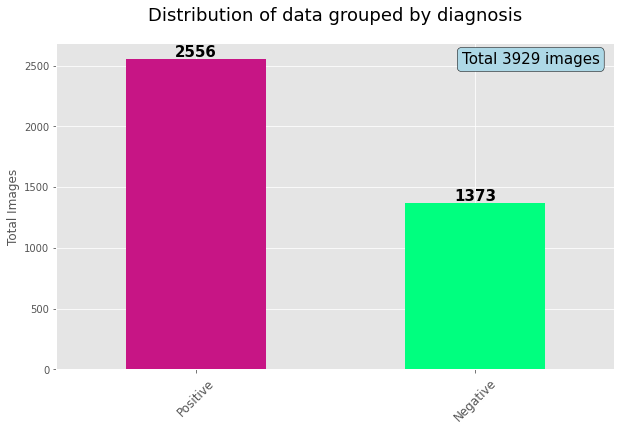

In [9]:
# Plot
ax = df.diagnosis.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(10, 6),
                                     color=["mediumvioletred", "springgreen"])
ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)
# Annotate
for i, rows in enumerate(df.diagnosis.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12), 
                rotation=0, color="black", 
                ha="center", verticalalignment='bottom', 
                fontsize=15, fontweight="bold")    
ax.text(1.2, 2550, f"Total {len(df)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );

Text(0.5, 1.005, 'Distribution of data grouped by ID and diagnosis')

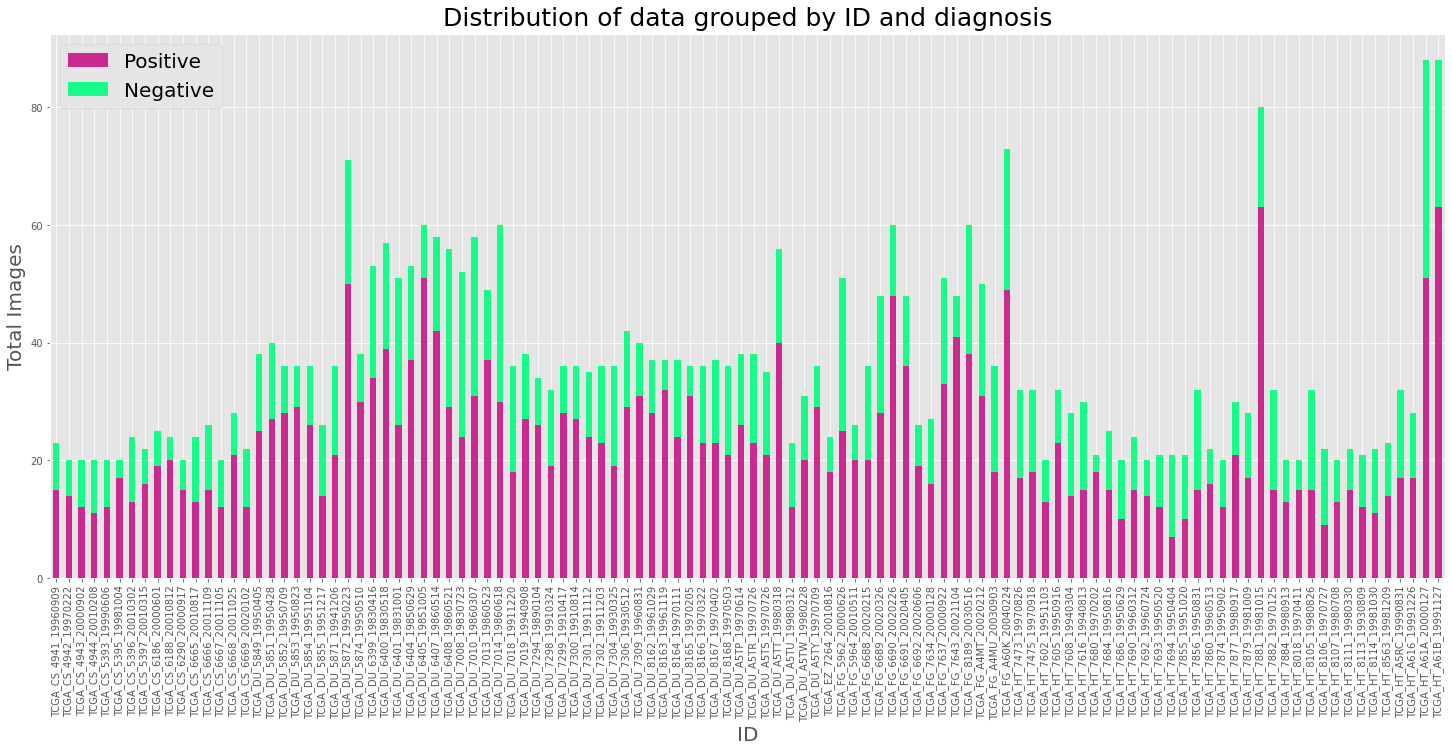

In [10]:
# Data
patients_by_diagnosis = df.groupby(['ID', 'diagnosis'])['diagnosis'].size().unstack().fillna(0)
patients_by_diagnosis.columns = ["Positive", "Negative"]

# Plot
ax = patients_by_diagnosis.plot(kind='bar',stacked=True,
                                figsize=(25, 10),
                                color=["mediumvioletred", "springgreen"], 
                                alpha=0.9)
ax.legend(fontsize=20)
ax.set_xlabel('ID',fontsize = 20)
ax.set_ylabel('Total Images', fontsize = 20)
ax.set_title("Distribution of data grouped by ID and diagnosis",fontsize = 25, y=1.005)

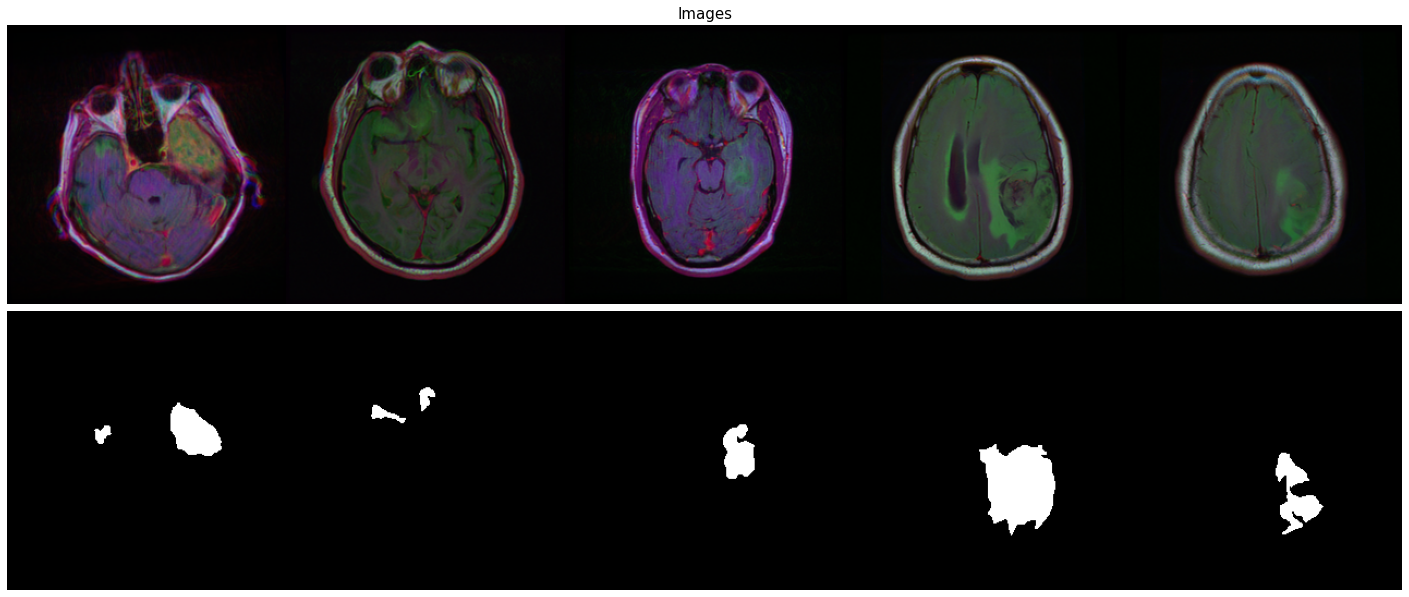

In [12]:
from mpl_toolkits.axes_grid1  import ImageGrid

IMG_SIZE = 256
# Data
sample_df = df[df["diagnosis"] == 1].sample(5).values
sample_imgs = []
for i, data in enumerate(sample_df):
    #print(data)
    img = cv2.resize(cv2.imread(data[1]), (IMG_SIZE, IMG_SIZE))
    mask = cv2.resize(cv2.imread(data[2]), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([img, mask])

sample_imgs_arr = np.hstack(np.array(sample_imgs[::2]))
sample_masks_arr = np.hstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(25., 25.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 1),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

grid[0].imshow(sample_imgs_arr)
grid[0].set_title("Images", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_masks_arr)
grid[1].set_title("Masks", fontsize=15, y=0.9)
grid[1].axis("off")
plt.show()